# Notebook: Análise Exploratória e Pré-processamento dos Dados

## 1. Introdução

Este notebook faz parte do projeto do Nanodegree 2025/1 da disciplina de Machine Learning & Inteligência Artificial.
Seu objetivo é explorar e preparar os dados para a tarefa de previsão de evasão de estudantes em um curso online síncrono promovido pela PensComp.

---

In [1]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 2.9 MB/s eta 0:00:00


In [3]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode

### Dados

In [4]:
df = pd.read_csv('dados_projeto_evasao_treino - Copia.csv')

### Entendimento Inicial

In [5]:
# Estrutura do DF
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

In [6]:
# Amostra dos dados
df.head()

,Unnamed: 0,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
0,1,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
1,3,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
2,4,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
3,5,NaN,1692744534,1693928454,20,6,0,4,0,0,...,0,1.0,NaN,NaN,1,62,1.0,0,NaN,NaN
4,6,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


In [7]:
# Classificação das colunas por tipo de prefixo
categoricas = [col for col in df.columns if col.startswith("ds_")]
temporais = [col for col in df.columns if col.startswith("ts_")]
numericas_nr = [col for col in df.columns if col.startswith("nr_")]
numericas_vl = [col for col in df.columns if col.startswith("vl_")]

print("\nColunas categóricas:", categoricas)
print("Colunas temporais:", temporais)
print("Colunas numéricas (contagem - nr_):", numericas_nr)
print("Colunas numéricas (valores/escalares - vl_):", numericas_vl)


Colunas categóricas: ['ds_cidade_usuario']
Colunas temporais: ['ts_primeiro_acesso', 'ts_ultimo_acesso']
Colunas numéricas (contagem - nr_): ['nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'nr_intervalos_uso', 'nr_dias_uso', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'nr_submissoes_codigo']
Colunas numéricas (valores/escalares - vl_): ['vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'vl_desempenho_usuario', 'vl_m

### Verificação de itens ausentes

In [8]:
# Verificando colunas que possuam ao menos um item nulo
missing = (df.isnull().mean() * 100).sort_values(ascending=True)

print("\nProporção de valores ausentes por coluna (%):")
print(missing[missing > 0].round(2))


Proporção de valores ausentes por coluna (%):
ds_cidade_usuario                       13.50
vl_medio_atividade_diaria               47.75
nr_intervalos_uso                       47.75
vl_desempenho_usuario                   71.75
vl_media_notas                          71.75
vl_medio_tempo_questionario             72.25
vl_medio_tempo_questionario_avaliado    73.25
vl_engajamento_notas                    84.75
vl_media_questoes_por_dia               84.75
vl_engajamento_usuario_por_intervalo    92.75
vl_engajamento_usuario_intradia         92.75
vl_desempenho_questionario              93.25
vl_submissoes_por_dias_ativos           98.00
vl_media_submissoes_codigo              99.00
dtype: float64


###  Análise de Cardinalidade

<ipython-input-30-1a22dcc5caf0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cardinalidade.values, y=cardinalidade.index, palette="crest")


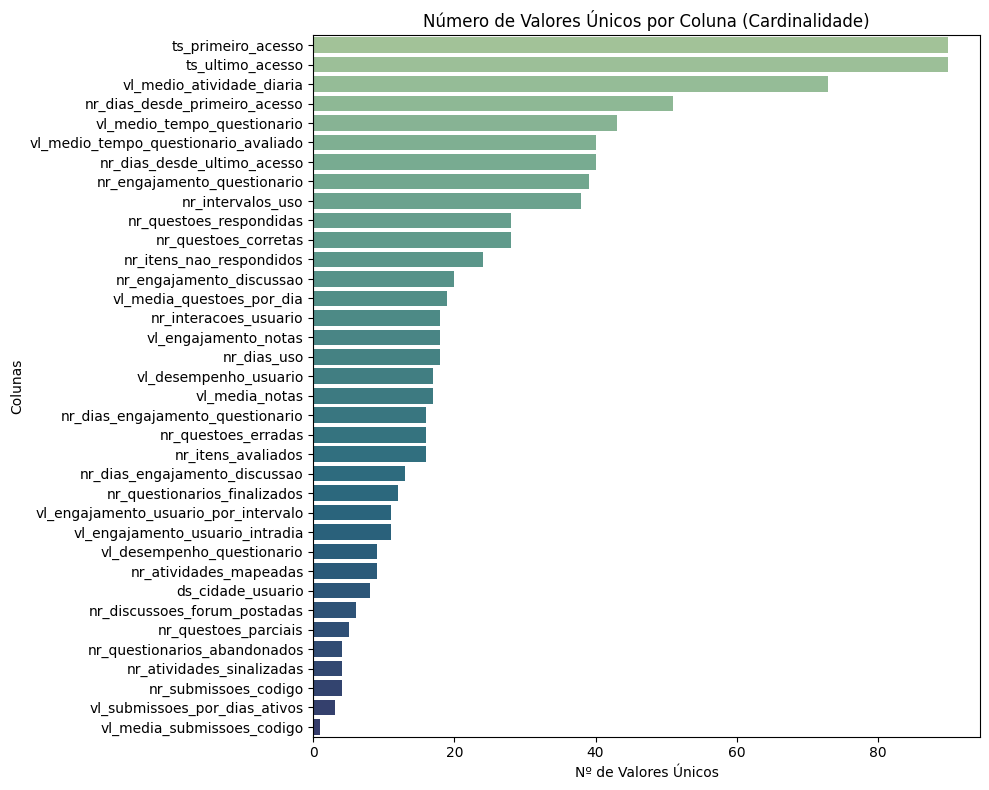

In [30]:
cardinalidade = df.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=cardinalidade.values, y=cardinalidade.index, palette="crest")
plt.title("Número de Valores Únicos por Coluna (Cardinalidade)")
plt.xlabel("Nº de Valores Únicos")
plt.ylabel("Colunas")
plt.tight_layout()
plt.show()


Primeiro vamos remover a coluna que representaria o ID para não influenciar na predição e após isso remover todas as linhas onde na coluna ts_primeiro_acesso esteja zerado "0", pois isso simboliza que o aluno nunca acessou o portal

In [11]:
df = df.drop("Unnamed: 0", axis=1)


In [12]:
df = df[df['ts_primeiro_acesso'] != 0]

In [13]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
3,NaN,1692744534,1693928454,20,6,0,4,0,0,1,...,0,1.000000,NaN,NaN,1,62,1.000000,0,NaN,NaN
5,NaN,1689612221,1693937636,56,6,0,0,0,0,4,...,1,0.991837,0.525,0.325,21,42,0.990476,47,6.7143,15.6667
7,Campinas,1692821395,1692905369,19,18,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
8,Campinas,1693359554,1693359711,13,13,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
9,NaN,1693187526,1693187600,15,15,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


Agora fizemos a conversao dos dados TS para um datetime

In [17]:
df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s')
df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s')

In [18]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
3,NaN,2023-08-22 22:48:54,2023-09-05 15:40:54,20,6,0,4,0,0,1,...,0,1.000000,NaN,NaN,1,62,1.000000,0,NaN,NaN
5,NaN,2023-07-17 16:43:41,2023-09-05 18:13:56,56,6,0,0,0,0,4,...,1,0.991837,0.525,0.325,21,42,0.990476,47,6.7143,15.6667
7,Campinas,2023-08-23 20:09:55,2023-08-24 19:29:29,19,18,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
8,Campinas,2023-08-30 01:39:14,2023-08-30 01:41:51,13,13,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
9,NaN,2023-08-28 01:52:06,2023-08-28 01:53:20,15,15,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


limpeza e formatação coluna cidade usuario

In [19]:
print(df['ds_cidade_usuario'].unique())

[nan 'Campinas' 'São Paulo' 'curitiba' 'Uru' 'Curitiba' 'Blumenau '
 'brasilia' 'Holambra' 'campinas' 'sao paulo']


In [20]:
import unidecode

df['ds_cidade_usuario'] = (
    df['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)

In [21]:
df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

<ipython-input-21-609b94dfec96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)


In [22]:
print(df['ds_cidade_usuario'].unique())

['CIDADE NAO INFORMADA' 'CAMPINAS' 'SAO PAULO' 'CURITIBA' 'URU' 'BLUMENAU'
 'BRASILIA' 'HOLAMBRA']


grafico da média de desempenho por cidade

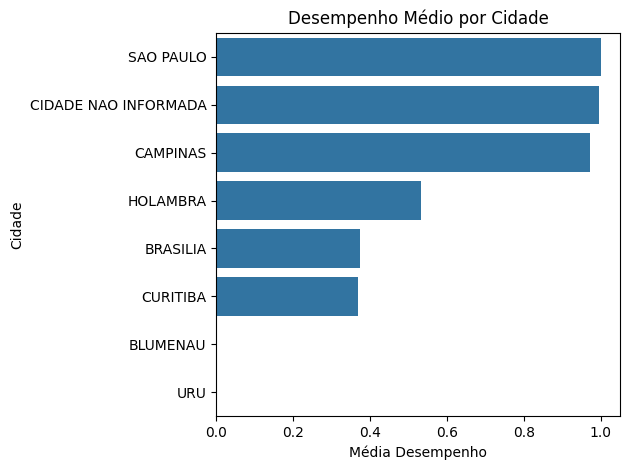

In [23]:
df_group = df.groupby('ds_cidade_usuario')['vl_desempenho_usuario'].mean().sort_values(ascending=False)

sns.barplot(x=df_group.values, y=df_group.index)
plt.title('Desempenho Médio por Cidade')
plt.xlabel('Média Desempenho')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("dados_convertidos.csv", index=False)


🚫 Mas nesse caso específico, com seu objetivo (prever evasão), eu não removeria logo de cara. Por quê?
Porque o "estar ausente" é informativo. Ou seja:

O aluno não fez submissão de código → Pode ser sinal de desengajamento.

O aluno não teve engajamento intradia → Pode ser indício de desinteresse.

Esses "nulos" representam comportamento, não erro.

### Identificação da Proporção de Outliers nas Variáveis Numéricas

<ipython-input-24-fdefcbd75a03>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outliers_df, x='% Outliers', y='Variável', palette='flare')


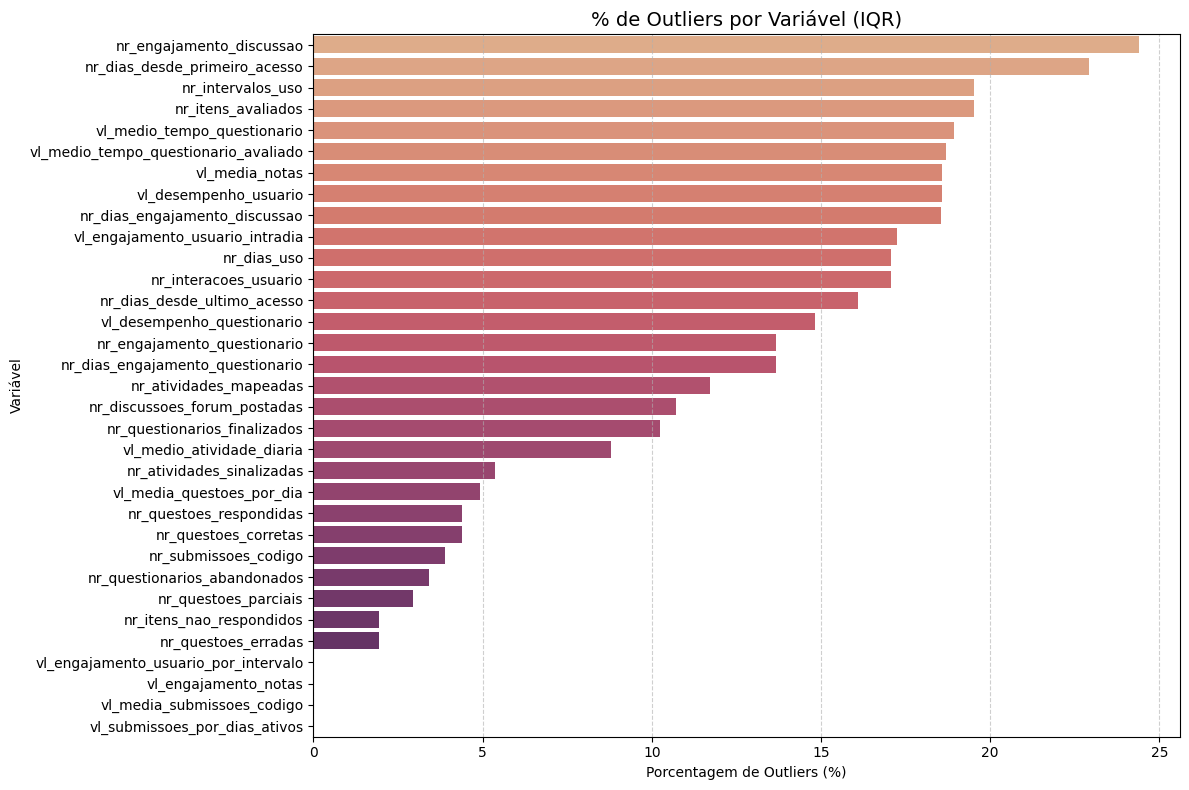

In [24]:
# Calcular outliers com base no IQR
outlier_summary = []
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    total = df[col].count()
    pct = (len(outliers) / total) * 100 if total > 0 else 0

    outlier_summary.append({
        'Variável': col,
        '% Outliers': round(pct, 2)
    })

outliers_df = pd.DataFrame(outlier_summary).sort_values(by='% Outliers', ascending=False)


# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=outliers_df, x='% Outliers', y='Variável', palette='flare')
plt.title('% de Outliers por Variável (IQR)', fontsize=14)
plt.xlabel('Porcentagem de Outliers (%)')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Distribuição do Desempenho Geral dos Alunos

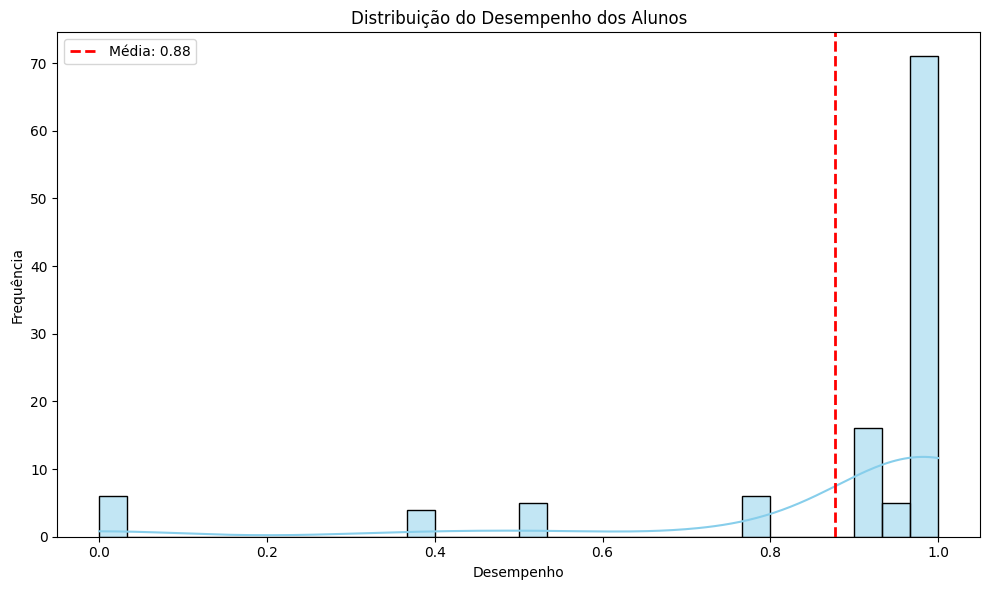

In [27]:
df['vl_desempenho_usuario'] = pd.to_numeric(df['vl_desempenho_usuario'], errors='coerce')
media_geral = df['vl_desempenho_usuario'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df['vl_desempenho_usuario'], bins=30, kde=True, color='skyblue')
plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f'Média: {media_geral:.2f}')
plt.title('Distribuição do Desempenho dos Alunos')
plt.xlabel('Desempenho')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()
